# LENDING CLUB CASE STUDY

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

#### In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
Company can use this analysis to identify the pattern of default, which will help in increasing their buisness
<br>
<br>



## Importing Libraries

In [119]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column',None) #to display all columns
#importing for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Creating Pandas Dataframe

In [120]:
df = pd.read_csv('data\loan.csv', low_memory=False)
print(df.shape)
print(df.info())
df.head()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [121]:
#identifying data types of all columns
df.dtypes 

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Data Cleaning
#### Column Cleaning

(array([10.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0., 56.]),
 array([1.0000e-02, 1.0009e+01, 2.0008e+01, 3.0007e+01, 4.0006e+01,
        5.0005e+01, 6.0004e+01, 7.0003e+01, 8.0002e+01, 9.0001e+01,
        1.0000e+02]),
 <BarContainer object of 10 artists>)

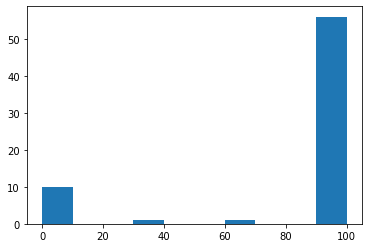

In [122]:
#Finding percentage of null values and their distribution to find the cleanup factor
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
plt.hist(per_null[per_null>0].sort_values(ascending= False))

By sorting we can see majority of the missing columns are above 30% scale, so we can ignore all columns with above 30%, and the columns with below 30% category can be imputed based on analysis

In [123]:
#cleaning columns with null values greater than 30% and verifying the percentage of null values
df.drop(per_null[per_null > 30].index, axis=1, inplace=True)
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

In [124]:
#analysis of higher null value columns
df[['emp_title','emp_length','pub_rec_bankruptcies','last_pymnt_d', 'collections_12_mths_ex_med','chargeoff_within_12_mths', 'title', 'revol_util']].head(10)

,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,title,revol_util
0,NaN,10+ years,0.0,Jan-15,0.0,0.0,Computer,83.70%
1,Ryder,< 1 year,0.0,Apr-13,0.0,0.0,bike,9.40%
2,NaN,10+ years,0.0,Jun-14,0.0,0.0,real estate business,98.50%
3,AIR RESOURCES BOARD,10+ years,0.0,Jan-15,0.0,0.0,personel,21%
4,University Medical Group,1 year,0.0,May-16,0.0,0.0,Personal,53.90%
5,Veolia Transportaton,3 years,0.0,Jan-15,0.0,0.0,My wedding loan I promise to pay back,28.30%
6,Southern Star Photography,8 years,0.0,May-16,0.0,0.0,Loan,85.60%
7,MKC Accounting,9 years,0.0,Jan-15,0.0,0.0,Car Downpayment,87.50%
8,NaN,4 years,0.0,Apr-12,0.0,0.0,Expand Business & Buy Debt Portfolio,32.60%
9,Starbucks,< 1 year,0.0,Nov-12,0.0,0.0,Building my credit history.,36.50%


In [125]:
#cleaning emp_title column as it is not required for analysis since we could not get any insight out of it
df.drop(['emp_title'], axis=1, inplace=True)

In [126]:
#analysing columns with 0 and other columns by Finding number of unique values in each column
print(df.collections_12_mths_ex_med.describe())
print(df.chargeoff_within_12_mths.describe())
print(df.nunique().sort_values().head(10))

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64
count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64
tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
dtype: int64


In [127]:
#removing columns that contain only one value for all rows
df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

##### Data Imputation for missing values in columns ( if required )
    
    Data imputation was not required in the above case because the either columns were not important for the insight or imputing that column might provide a false analysis, if incase we need to impute a column, find an example below for the pub_rec_bankruptcies
    
###### for filling missing values with highest ocurrence value 
    df.pub_rec_bankruptcies = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0]) 
    
###### for filling missing values with any other value
    df.pub_rec_bankruptcies = df['pub_rec_bankruptcies'].fillna('0', inplace = True) 

In [128]:
#Checking the null value percentage after cleaning
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

emp_length              2.71
pub_rec_bankruptcies    1.75
last_pymnt_d            0.18
revol_util              0.13
title                   0.03
last_credit_pull_d      0.01
dtype: float64

### Rows

#### From the above column cleaning most of the columns that were not required for the insight are removed, there are few more columns which have null values, but are required for the analysis so removing the rows where there are null values for those particular columns.

In [129]:
#Removing all the null/blank rows from dataset
df=df[-df.emp_length.isnull()]
df=df[-df.pub_rec_bankruptcies.isnull()]
df=df[-df.last_pymnt_d.isnull()]
df=df[-df.revol_util.isnull()]
df=df[-df.title.isnull()]
df=df[-df.last_credit_pull_d.isnull()]

In [130]:
#Checking the null value percentage after cleaning
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

Series([], dtype: float64)

### Sanity Checks and Data type validations

In [131]:
df.shape

(37825, 43)

In [132]:
#Finding number of unique values, printing high unique valued columns
df.nunique().sort_values(ascending=False).head(20)

id                         37825
url                        37825
member_id                  37825
total_pymnt                36098
total_pymnt_inv            35790
total_rec_int              33656
last_pymnt_amnt            33546
revol_bal                  21197
title                      18677
installment                14717
funded_amnt_inv             7745
total_rec_prncp             7562
annual_inc                  5026
recoveries                  3780
dti                         2863
collection_recovery_fee     2488
total_rec_late_fee          1274
out_prncp_inv               1097
out_prncp                   1096
revol_util                  1087
dtype: int64

Member id, ID, URL has all rows as unique values. All are just random number which cannot be used for any analysis, any one can be retained for ID purpose.

In [133]:
#retaining ID alone and removing member_id and url
df.drop(['member_id', 'url'], axis=1, inplace=True)

In [134]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [135]:
#removing "months" from term column and converting it to a numeric data type
df.term = (df.term.str.rstrip('months')).astype(float)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37825 entries, 0 to 39680
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37825 non-null  int64  
 1   loan_amnt                37825 non-null  int64  
 2   funded_amnt              37825 non-null  int64  
 3   funded_amnt_inv          37825 non-null  float64
 4   term                     37825 non-null  float64
 5   int_rate                 37825 non-null  object 
 6   installment              37825 non-null  float64
 7   grade                    37825 non-null  object 
 8   sub_grade                37825 non-null  object 
 9   emp_length               37825 non-null  object 
 10  home_ownership           37825 non-null  object 
 11  annual_inc               37825 non-null  float64
 12  verification_status      37825 non-null  object 
 13  issue_d                  37825 non-null  object 
 14  loan_status           

In [137]:
#removing % symbols from int_rata and revol_util as they are numeric columns being read as an object by pandas
df.int_rate = (df.int_rate.str.rstrip('%')).astype(float)
df.revol_util = (df.revol_util.str.rstrip('%')).astype(float)
df.int_rate.describe()

count    37825.000000
mean        12.070531
std          3.734364
min          5.420000
25%          9.320000
50%         11.860000
75%         14.610000
max         24.590000
Name: int_rate, dtype: float64

#### Outlier Detection

    Eg :Annual income is a parameter which has a high influence of defaulting/ Non-defaulting there may be many outlier if any rich person is available in the list.

In [138]:
# Ignore warnings for seaborn or any visulaization issues
import warnings
warnings.filterwarnings('ignore')

count    3.782500e+04
mean     6.967560e+04
std      6.365015e+04
min      4.000000e+03
5%       2.464800e+04
10%      3.000000e+04
25%      4.190000e+04
50%      6.000000e+04
75%      8.350000e+04
90%      1.171856e+05
95%      1.439000e+05
99%      2.350000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64


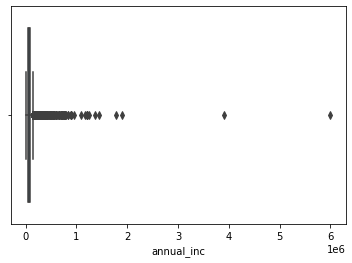

In [139]:
print(df.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]))
sns.boxplot(df.annual_inc)
plt.show()

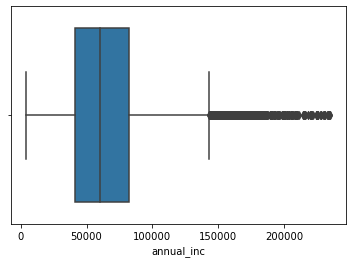

count     37442.000000
mean      66242.532083
std       35159.440891
min        4000.000000
25%       41300.000000
50%       60000.000000
75%       82000.000000
max      234996.000000
Name: annual_inc, dtype: float64


In [140]:
#From the above description we can identify there is a huge jump from 99 to the max value, so it is an outlier, removing them and verification of quantile
df = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)]
sns.boxplot(df.annual_inc)
plt.show()
print(df.annual_inc.describe())

In [141]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60.0,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


###### Data cleaning is completed, DATA is Ready For EDA 
## Exploratory Data Analysis

    1. Derived metrics (Deriving other useful Variables from columns)
    2. Univariate Analysis
    3. Bivariate Analysis

## 1. Derived Metrics

In [142]:
#creating a column that contains total amount to be paid with interest
#this can be used for influence of term and interest rate analysis

df['total_amnt_to_pay'] = df.term * df.installment

In [143]:
#converting loan issue date format for pulling out year and month
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_year'] = df.issue_d.dt.year
df['issue_month'] = df.issue_d.dt.month

#converting earliest credit line date format for pulling out year and month
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df['cr_year'] = df.earliest_cr_line.dt.year
df['cr_month'] = df.earliest_cr_line.dt.month

In [272]:
# categorising annual incomes in a range
df['income_range'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [273]:
#verifying the 3 columns
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,amnt_to_pay,issue_year,issue_month,cr_year,cr_month,income_range
0,1077501,5000,5000,4975.0,36.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,5863.32,2011,12,1985,1,20000-40000
1,1077430,2500,2500,2500.0,60.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,3589.80,2011,12,1999,4,20000-40000
2,1077175,2400,2400,2400.0,36.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,3035.88,2011,12,2001,11,0-20000
3,1076863,10000,10000,10000.0,36.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,12215.16,2011,12,1996,2,40000-60000
4,1075358,3000,3000,3000.0,60.0,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,4067.40,2011,12,1996,1,60000-80000


## 2. Univariate Analysis

#### Loan Amount

In [262]:
def label_annotate(per = 1, vis = ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height()*per, '.1f')+ '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')

In [263]:
#Analysing the loan amount column initially to identify the outliers and to have an insight out of it
df.loan_amnt.describe()

count    37442.000000
mean     11240.159447
std       7394.607485
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

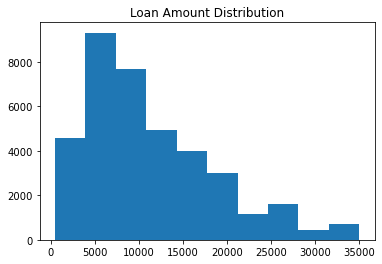

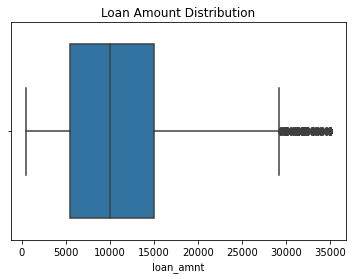

In [264]:
#Histogram plot of loan amount column
plt.hist(df.loan_amnt)
plt.title('Loan Amount Distribution')
plt.show()
sns.boxplot(df.loan_amnt)
plt.title('Loan Amount Distribution')
plt.show()

###### Observations:
    1. The above plots indicate Very few people opted for higher amount loans, most of the people were borrowing from 10000-20000, 
    2. This Observation can help the management to provide many offers to those category to make them opt for higher amount

#### Funded Amount by investors

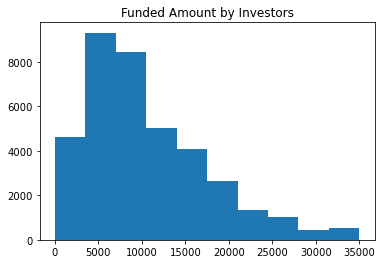

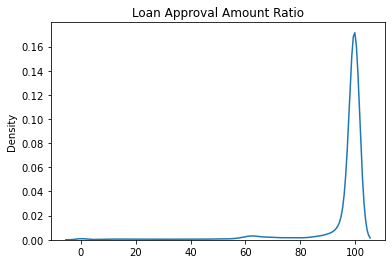

In [265]:
#plotting funded amount by investor to identify the trend
plt.hist(df.funded_amnt_inv)
plt.title('Funded Amount by Investors')
plt.show()

#Deriving and plotting the ratio of funded amount to loan amount
sns.distplot(a = round(df.funded_amnt_inv*100/df.loan_amnt,2), hist = False)
plt.title('Loan Approval Amount Ratio')
plt.show()


###### Observations:
    1. The above plots indicate that loan amount distribution is almost similar to the funded amount approved by investors, 
    2. In addition to that we also confirmed the data with one more plot which indicates the ratio of approved funded amount to loan amount.
        * Almost all the Loans were approved, we can identify this by looking at the curve that is skewed towards 100%

#### Loan Status

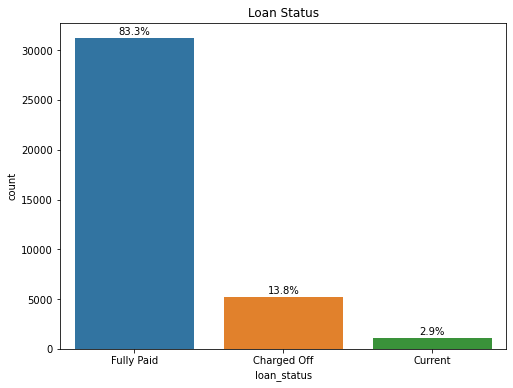

In [270]:
#plotting loan_status
plt.figure(figsize=(8,6))
ax = sns.countplot(x= df.loan_status)
label_annotate(per = 100/len(df))
plt.title("Loan Status")
plt.show()

###### Observations:
    The above plots indicate most of the loans were full paid, but still we have aorun 13.8 % of loans that were charged off due to some reasons

## 2. Bivariate Analysis
    
        i) Comparing Loan repay status with all variables to identify the factor of deafulting the loan

### Loan Repay Status Vs Term

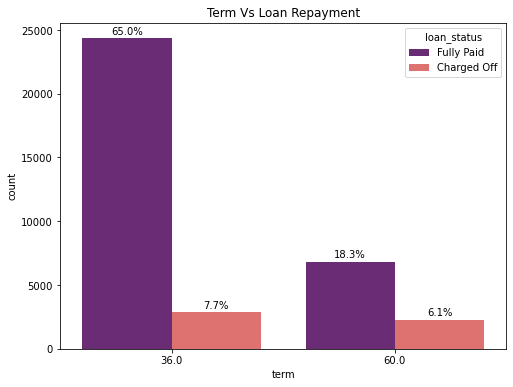

In [532]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="term", data = df, hue= "loan_status", hue_order = ['Fully Paid', 'Charged Off'], palette = 'magma')
plt.title("Term Vs Loan Repayment")
label_annotate(per = 100/len(df))
plt.show()

###### Observations:
    The above plots indicate that proportionally more percentage of loans were charged off for 60months term compared to 36months

###### **Main function for creating groups and plots for charged off loans

In [542]:
#creating a function for grouping and plotting with charged off prop

def bivar_grouping(column_name, label1 , label2, title, x = 9, y = 6):
    df_name = df.groupby([column_name, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index() 
    df_name['chargedoff_prop'] = df_name['Charged Off'] / (df_name['Charged Off'] + df_name['Current'] + df_name['Fully Paid'])
    
    plt.figure(figsize=(x,y))
    ax = sns.barplot(x=column_name,y='chargedoff_prop', data = df_name, palette = 'magma')
    ax.set_ylabel(label2,fontsize=15)
    ax.set_xlabel(label1,fontsize=15)
    plt.title(title,fontsize=16)
    plt.show()
    return df_name

    

### Loan Repay Status (Charged Off) Vs Annual Income

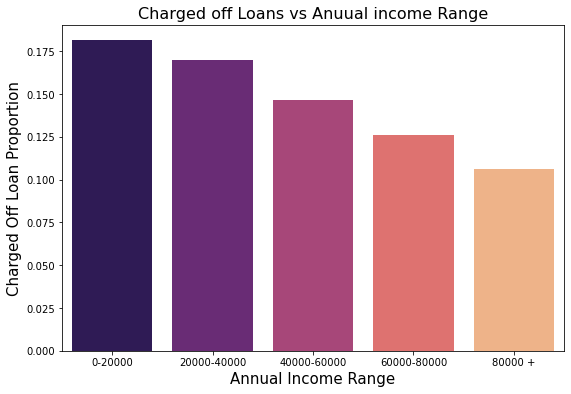

loan_status,income_range,Charged Off,Current,Fully Paid,chargedoff_prop
0,0-20000,173,6,774,0.181532
1,20000-40000,1369,156,6539,0.169767
2,40000-60000,1630,327,9167,0.146530
3,60000-80000,957,237,6400,0.126021
4,80000 +,1033,358,8316,0.106418


In [545]:
#creating a group for incomerange and loan status and plotting them using the user defined function bivar_grouping
df_chargeoff = bivar_grouping('income_range', 'Annual Income Range' , 'Charged Off Loan Proportion' , 'Charged off Loans vs Anuual income Range')
df_chargeoff.head()

###### Observations:
    1. The above plots indicate that increase in income range play a high influence on charge off of loans
    2. Number of charged off loans decreases with increase in income

### Loan Repay Status (Charged Off) Vs Loan Purpose

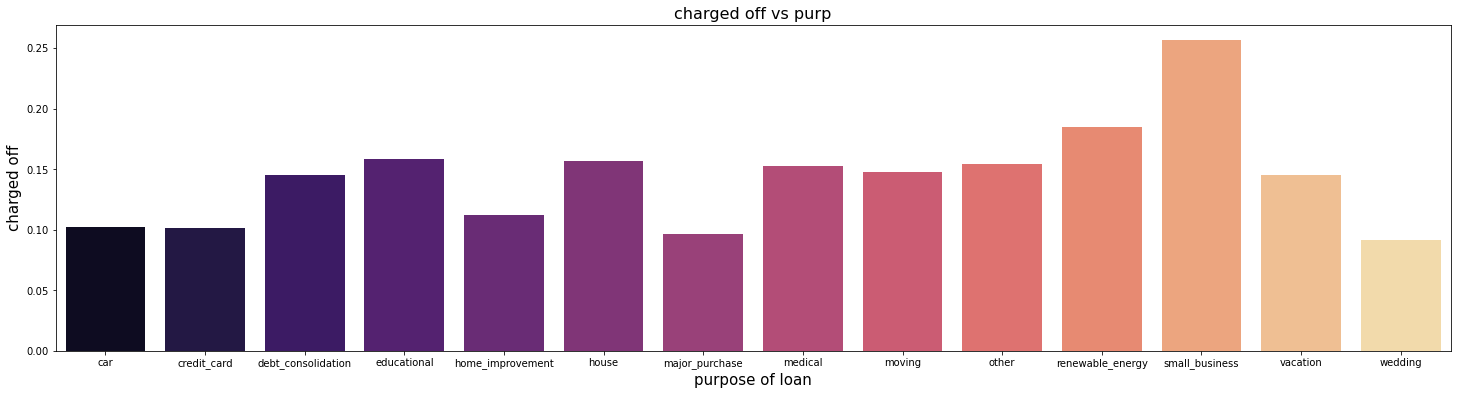

loan_status,purpose,Charged Off,Current,Fully Paid,chargedoff_prop
0,car,151.0,49.0,1271.0,0.102651
1,credit_card,494.0,100.0,4263.0,0.101709
2,debt_consolidation,2580.0,561.0,14628.0,0.145197
3,educational,46.0,0.0,244.0,0.158621
4,home_improvement,308.0,90.0,2347.0,0.112204


In [546]:
#creating a group for purpose and loan status and plotting them using the user defined function bivar_grouping
df_purpose = bivar_grouping('purpose', 'purpose of loan' , 'Charged Off Loan Proportion' , 'Charged off Loans vs Purpose of loan',25,6)
df_purpose.head()

###### Observations:
    1. The above plots indicate that people who took loans for small buisness were the highest defaulters
    2. Consumer loans such as car, credit card, other purchases were among the less defaulting loans

### Loan Repay Status (Charged Off) Vs Grades

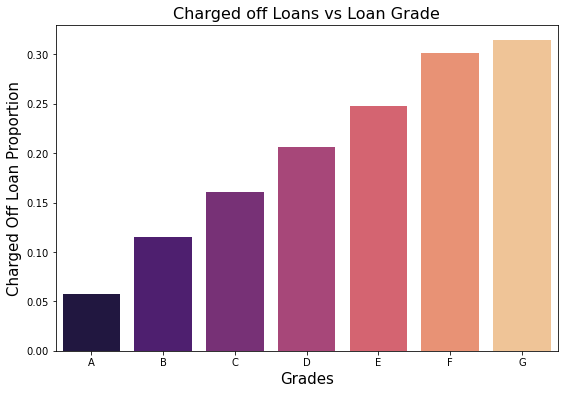

loan_status,grade,Charged Off,Current,Fully Paid,chargedoff_prop
0,A,545,35,8900,0.057489
1,B,1305,326,9741,0.114756
2,C,1224,255,6150,0.160440
3,D,1030,210,3750,0.206413
4,E,667,172,1848,0.248232


In [547]:
#creating a group for purpose and loan status and plotting them using the user defined function bivar_grouping
df_grade = bivar_grouping('grade', 'Grades' , 'Charged Off Loan Proportion' , 'Charged off Loans vs Loan Grade')
df_grade.head()

###### Observations:
    1. The above plots indicate that loan charging off increases with increase in Grade alphabets
    2. Grade A has less defaulters and whereas the last grade "G" has the most number of charged off loans

###### There is a subgrade for each grade so analysing them further can provide more insights

### Loan Repay Status (Charged Off) Vs Sub Grades

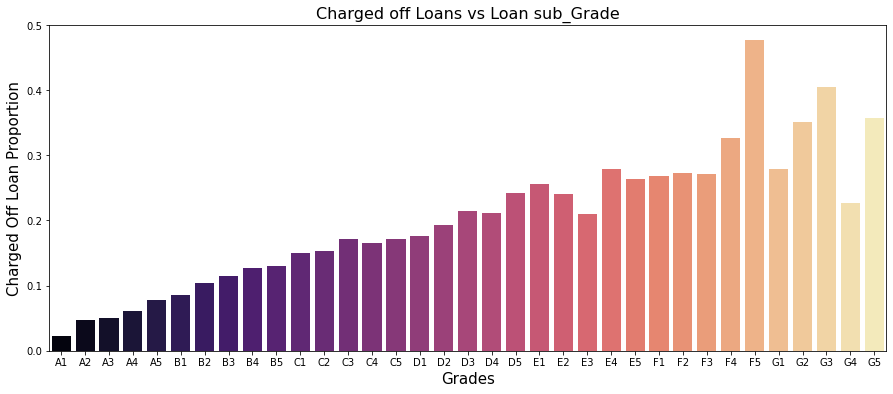

loan_status,sub_grade,Charged Off,Current,Fully Paid,chargedoff_prop
0,A1,24.0,0.0,1010.0,0.023211
1,A2,66.0,0.0,1336.0,0.047076
2,A3,86.0,0.0,1603.0,0.050918
3,A4,167.0,11.0,2576.0,0.060639
4,A5,202.0,24.0,2375.0,0.077662


In [552]:
#creating a group for purpose and loan status and plotting them using the user defined function bivar_grouping
df_subgrade = bivar_grouping('sub_grade', 'Grades' , 'Charged Off Loan Proportion' , 'Charged off Loans vs Loan sub_Grade', 15, 6)
df_subgrade.head()

###### Observations:
    1. The above plots indicate the same which grade vs loans status plot was indicating, loan defaults increases with increase in grade A being minimum.
    2. plots indicate F5 which is a sub grade of F has the highest charged off loans